In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("city.csv")
df = df.set_index(df.city).drop(columns="city")
df = df.sort_values(by=list(df.columns), ascending=False)
for i in df.columns:
  df[i] = df[i].replace({ "Ab" : 0.5, "yes" : 1, "no" : 0})
s_df = pd.read_csv("risk_pred.csv")
s_df = s_df.set_index(s_df.city).drop(columns="city")
s_df = s_df.loc[df.index]
df.index.name = 'county'
s_df.index.name = 'county'

In [3]:
scaler = MinMaxScaler()
data = s_df.to_numpy(copy=True)
scaler.fit(data)
data = scaler.transform(data)
x_df = pd.DataFrame(data, columns=s_df.columns, index=s_df.index)

In [5]:
truth = df.to_numpy(copy=True)
pred = x_df[df.columns].to_numpy(copy=True)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if truth[i][j]==0.5:
            truth[i][j] = pred[i][j]
m_df = pd.DataFrame(truth, columns=df.columns, index=s_df.index)


In [7]:
truth = df.to_numpy(copy=True)
pred = x_df[df.columns].to_numpy(copy=True)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if truth[i][j]!=0.5:
            truth[i][j] = pred[i][j]
r_df = pd.DataFrame(truth, columns=df.columns, index=s_df.index)

<AxesSubplot:ylabel='county'>

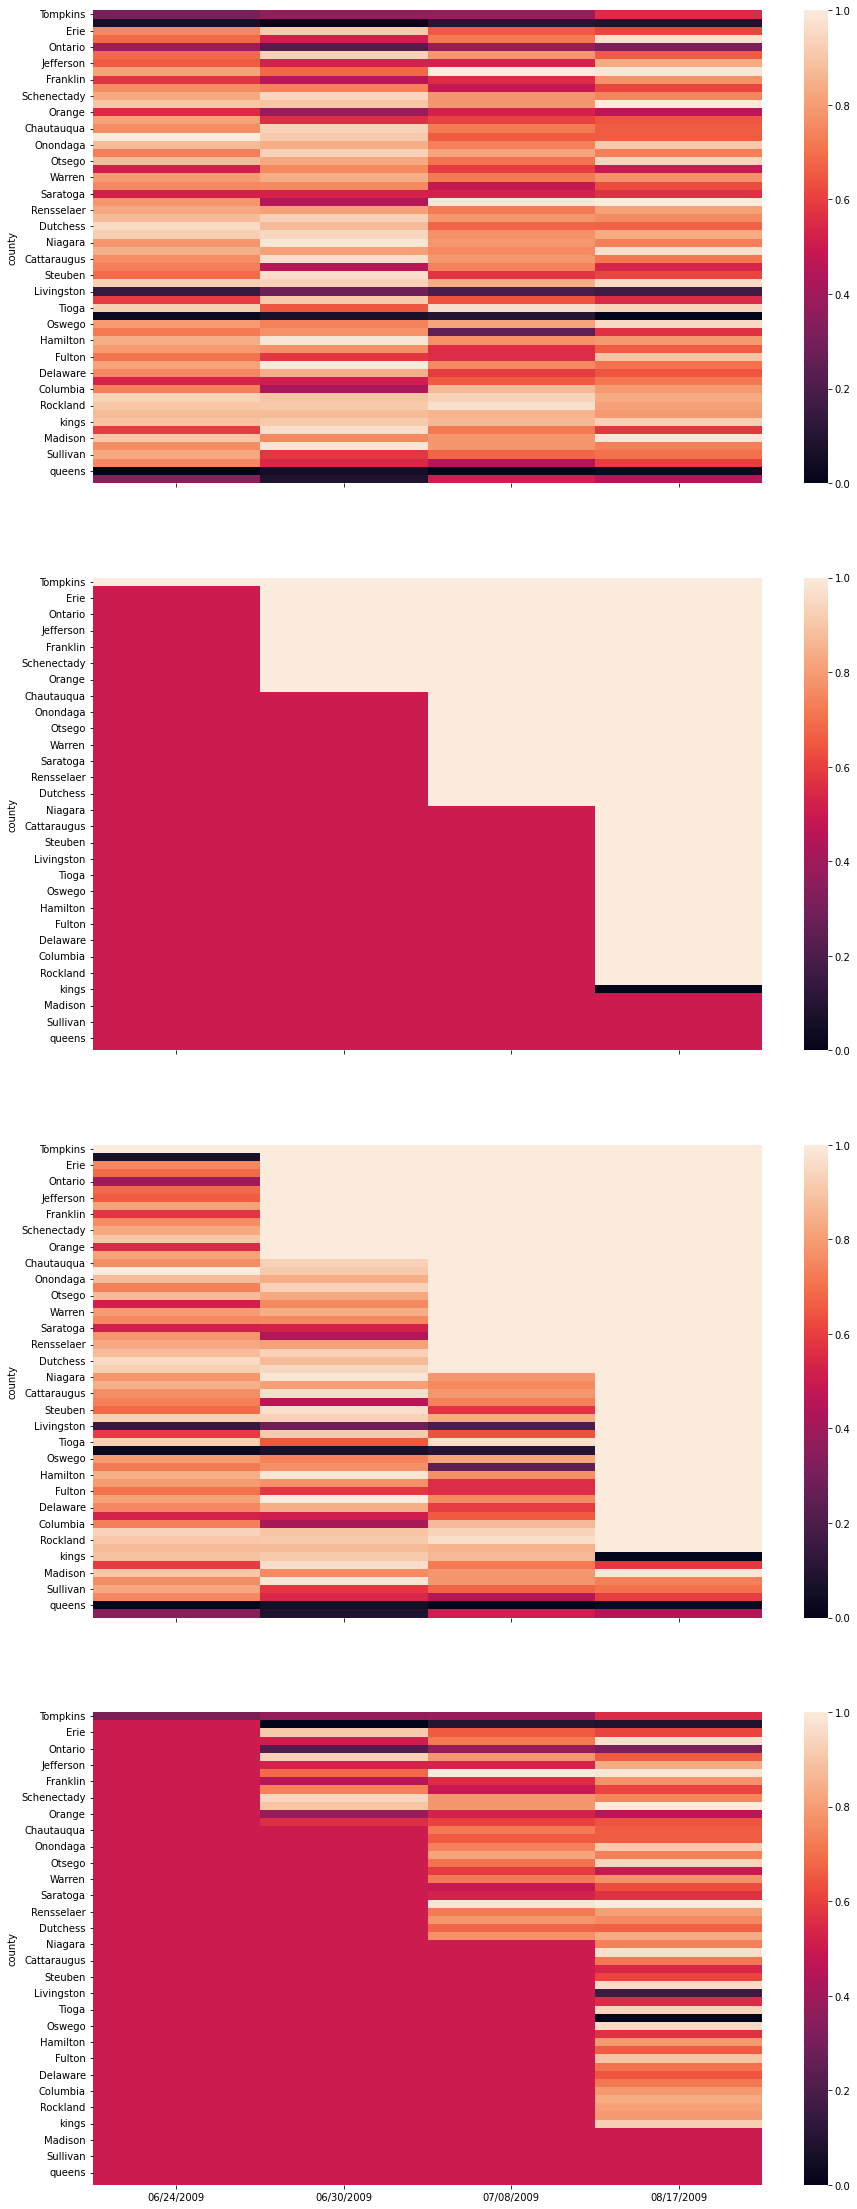

In [12]:
fig, axs = plt.subplots(nrows=4, sharex=True)
fig.set_figwidth(15)
fig.set_figheight(40)

sns.heatmap(x_df[df.columns], ax=axs[0])
sns.heatmap(df, ax=axs[1])
sns.heatmap(m_df, ax=axs[2])
sns.heatmap(r_df, ax=axs[3])

In [15]:
for i in df.columns:
    print(x_df[i].sum())

40.89062500000001
40.631578947368425
37.934426229508205
40.014925373134325


In [16]:
for i in df.columns:
    print(df[i].sum())

29.5
36.0
43.0
53.5
